### H&M Mid Term Project <h3>

### Articles:

- Cleaning DataFrame

- Some insights



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 100

In [8]:
articles = pd.read_csv ('articles.csv')
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


Checking the missing values

In [13]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

Only one column - detail desc - has missing values but this is a very small fraction of the dataset - about 0.4%.

In [22]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [17]:
articles[articles['detail_desc'].isna()==True]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,351332007,351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,7,Grey,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,420049002,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,420049003,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2742,426199002,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010016,Solid,9,Black,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
2743,426199010,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010017,Stripe,8,Dark Grey,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67838,752458001,752458,Poissy boho dress,265,Dress,Garment Full body,1010007,Embroidery,10,White,...,Dress,A,Ladieswear,1,Ladieswear,6,Womens Casual,1013,Dresses Ladies,NaN
72720,768842001,768842,Andrews set,270,Garment Set,Garment Full body,1010017,Stripe,10,White,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
72721,768842004,768842,Andrews set,270,Garment Set,Garment Full body,1010004,Check,73,Dark Blue,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
93144,856985001,856985,Pogo rope,67,Belt,Accessories,1010016,Solid,12,Light Beige,...,Belts,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,NaN


In [81]:
department = articles['department_name'].value_counts()
department

Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: department_name, Length: 250, dtype: int64

In [18]:
articles.duplicated().sum()

0

In [29]:
group = articles['index_group_name'].value_counts()
group

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

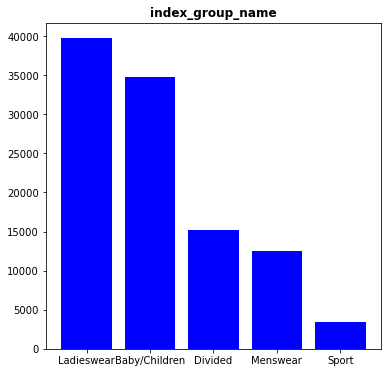

In [30]:
# create figure and axes
fig, ax = plt.subplots(figsize = (6,6))

# set title
ax.set_title('index_group_name', fontweight='bold')

# plot the bar chart
ax.bar(group.index, group, color=('blue'))
plt.show();

In [91]:
divided = articles[articles['index_name']=='Divided']
divided[['prod_name','product_type_name','detail_desc','index_name','section_name','garment_group_name']].drop_duplicates().head(12)

,prod_name,product_type_name,detail_desc,index_name,section_name,garment_group_name
78,Sigge sneaker sock 5p,Socks,Fine-knit trainer socks in various colours.,Divided,Divided Basics,"Under-, Nightwear"
124,Eva chelsea boot,Boots,Chelsea boots with elasticated gores in the si...,Divided,Divided Accessories,Shoes
125,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"
149,Lena over knee.,Socks,Fine-knit over-the-knee socks.,Divided,Divided Basics,"Under-, Nightwear"
175,Tina leggings,Leggings/Tights,Leggings in extra sturdy jersey with an elasti...,Divided,Divided Basics,Jersey Basic
176,Heavy jsy long leg,Leggings/Tights,Leggings in extra sturdy jersey with an elasti...,Divided,Divided Basics,Jersey Basic
186,Jodi skirt,Skirt,"Short, bell-shaped skirt in stretch jersey wit...",Divided,Divided Basics,Jersey Basic
187,Long Leg Leggings,Leggings/Tights,Leggings in stretch jersey with an elasticated...,Divided,Divided Basics,Jersey Basic
189,Raven skirt,Skirt,Short jersey skirt with an elasticated waist.,Divided,Divided Basics,Jersey Basic
193,Carolina sweater (1),Sweater,Long-sleeved top in sweatshirt fabric with rib...,Divided,Divided Basics,Jersey Basic


In [26]:
section = articles['section_name'].value_counts()
section

Womens Everyday Collection        7295
Divided Collection                7124
Baby Essentials & Complements     4932
Kids Girl                         4469
Young Girl                        3899
Womens Lingerie                   3598
Girls Underwear & Basics          3490
Womens Tailoring                  3376
Kids Boy                          3328
Womens Small accessories          3270
Womens Casual                     2725
Kids Outerwear                    2665
Womens Trend                      2622
Divided Projects                  2364
Young Boy                         2352
H&M+                              2337
Men Underwear                     2322
Mama                              2266
Kids & Baby Shoes                 2142
Boys Underwear & Basics           2034
Womens Shoes                      2026
Ladies H&M Sport                  1894
Womens Swimwear, beachwear        1839
Contemporary Smart                1778
Baby Girl                         1760
Divided Accessories      

In [110]:
section = articles.groupby(["product_group_name"])["section_name"].unique()
df_section = pd.DataFrame({'Product Group': section.index,
                   'Product Section': section.count
                  })
df_section = df_section.count(['Product Sections'])
plt.figure(figsize = (8,6))
plt.title('Sections in Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y='Product Section', data=df_section)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show();

TypeError: unhashable type: 'list'

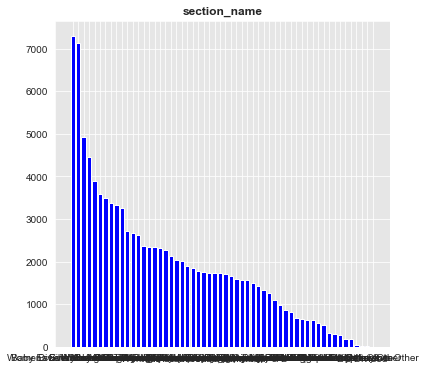

In [94]:
# create figure and axes
fig, ax = plt.subplots(figsize = (6,6))

# set title
ax.set_title('section_name', fontweight='bold')

# plot the bar chart
ax.bar(section.index, section, color=('blue'))
plt.show();

In [74]:
articles.groupby(['index_group_name', 'section_name'])['section_name'].agg('size')

index_group_name  section_name                  
Baby/Children     Baby Boy                          1717
                  Baby Essentials & Complements     4932
                  Baby Girl                         1760
                  Boys Underwear & Basics           2034
                  Girls Underwear & Basics          3490
                  Kids & Baby Shoes                 2142
                  Kids Accessories, Swimwear & D    1731
                  Kids Boy                          3328
                  Kids Girl                         4469
                  Kids Local Relevance               192
                  Kids Outerwear                    2665
                  Young Boy                         2352
                  Young Girl                        3899
Divided           Divided Accessories               1732
                  Divided Asia keys                  280
                  Divided Basics                    1723
                  Divided Collection   

In [76]:
import matplotlib.ticker as mtick

def plot_bar(database, col, figsize=(13,5), pct=False, label='articles'):
    fig, ax = plt.subplots(figsize=figsize, facecolor='#f6f6f6')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2)
        ax.spines[loc].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if pct:
        data = database[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)
        ax.set_xlabel('% of ' + label, fontsize=10, weight='bold')
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)        
        ax.set_xlabel('# of articles' + label)
        
    ax.grid(zorder=0)
    ax.text(0, -0.75, col, color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
    ax.set_ylabel('')
        
    plt.show();

Most of the articles are in categories (index) of Ladieswear and Baby/Children. The smallest amount of articles is in Sport group.

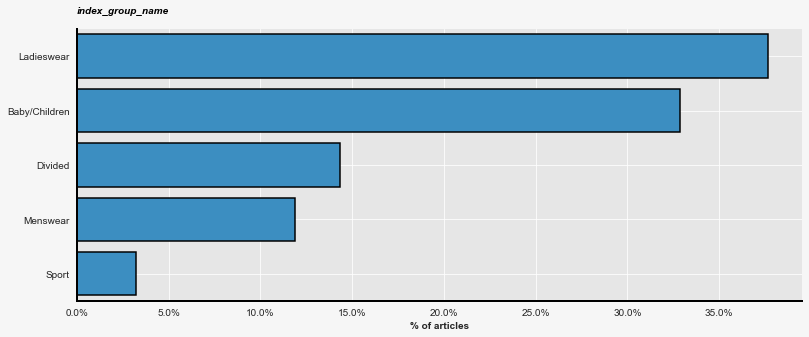

In [78]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(articles, 'index_group_name', pct=True)

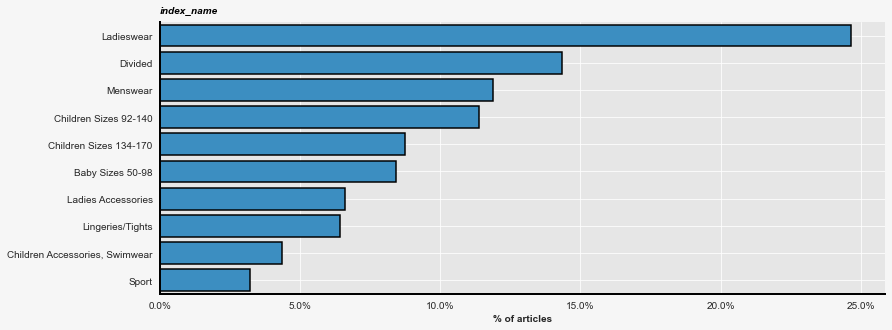

In [80]:
plot_bar(articles, 'index_name', pct=True)

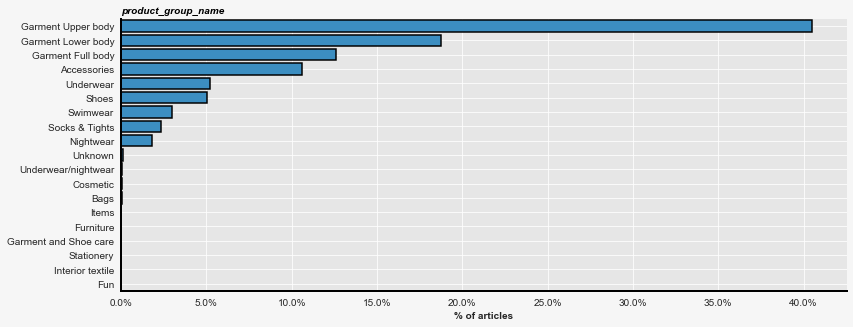

In [82]:
plot_bar(articles, 'product_group_name', pct=True)

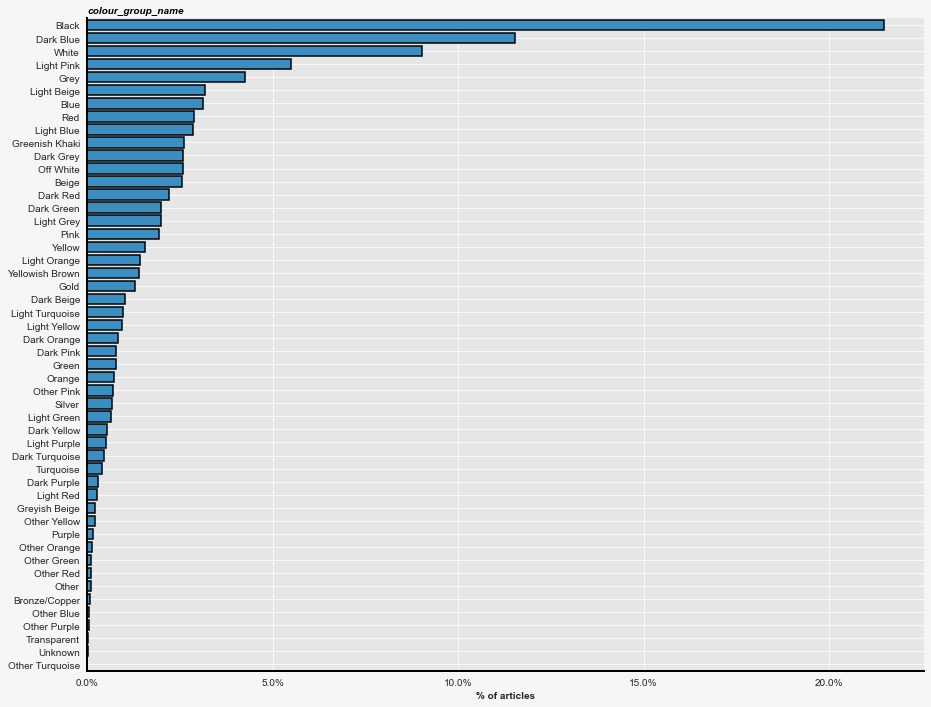

In [83]:
plot_bar(articles, 'colour_group_name', figsize=(15,12), pct=True)

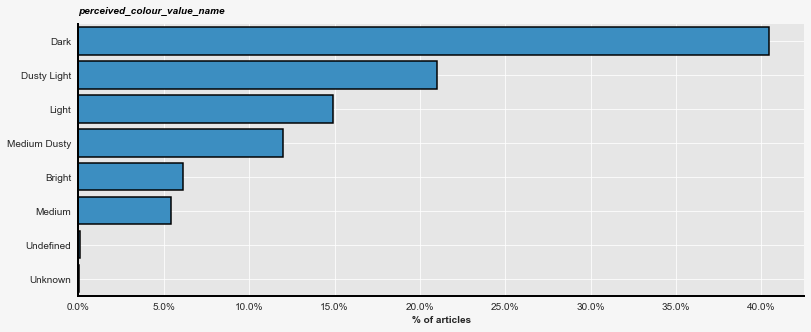

In [85]:
plot_bar(articles, 'perceived_colour_value_name', pct=True)

AttributeError: 'AxesSubplot' object has no attribute 'size'

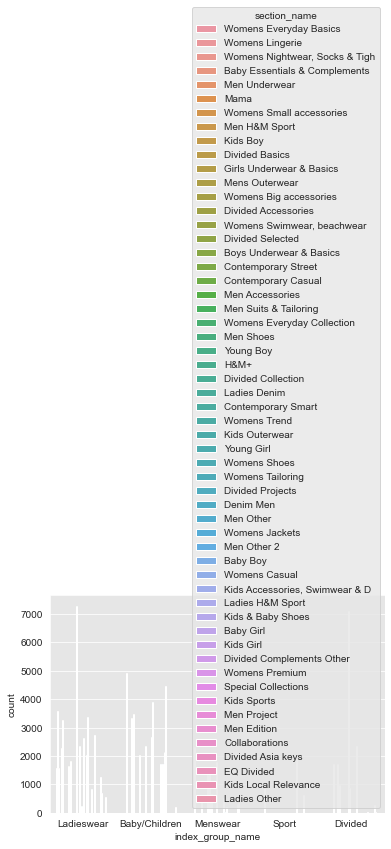

In [98]:
sns.countplot(x='index_group_name', hue='section_name', data=articles)
plt.show();

# FINAL DEL NOTEBOOK

In [9]:
customers = pd.read_csv ('customers.csv')
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [10]:
sample = pd.read_csv ('sample_submission.csv')
sample

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...


In [12]:
transactions = pd.read_csv ('transactions_train.csv')
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [86]:
days = transactions['t_dat'].value_counts()
days

2019-09-28    198622
2020-04-11    162799
2019-11-29    160875
2018-11-23    142018
2018-09-29    141700
               ...  
2019-01-01     18145
2018-09-22     17635
2018-12-25     14799
2019-12-25     13637
2020-01-01     12760
Name: t_dat, Length: 734, dtype: int64

In [87]:
df_new = pd.concat([transactions, customers], axis=1)

In [88]:
df_new

,t_dat,customer_id,article_id,price,sales_channel_id,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_final = pd.concat([df_new, articles], axis=1)

In [90]:
df_final

,t_dat,customer_id,article_id,price,sales_channel_id,customer_id,FN,Active,club_member_status,fashion_news_frequency,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,...,Jersey Basic,A,Ladieswear,1.0,Ladieswear,16.0,Womens Everyday Basics,1002.0,Jersey Basic,Jersey top with narrow shoulder straps.
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,...,Jersey Basic,A,Ladieswear,1.0,Ladieswear,16.0,Womens Everyday Basics,1002.0,Jersey Basic,Jersey top with narrow shoulder straps.
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,...,Jersey Basic,A,Ladieswear,1.0,Ladieswear,16.0,Womens Everyday Basics,1002.0,Jersey Basic,Jersey top with narrow shoulder straps.
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,...,Clean Lingerie,B,Lingeries/Tights,1.0,Ladieswear,61.0,Womens Lingerie,1017.0,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,...,Clean Lingerie,B,Lingeries/Tights,1.0,Ladieswear,61.0,Womens Lingerie,1017.0,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
